## Initial Data Exploration

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv("../data/2025_data_to_explore.csv", index_col=0)

In [39]:
data.head()

,id,company_description,source,is_edited,created_at
0,370341,Cegid is a leading provider of cloud business ...,LinkedIn - Reported,0.0,2023-08-05 12:22:59
1,537105,Page 1 Printers is a service oriented printing...,LinkedIn - Reported,0.0,2023-10-31 02:53:58
2,581168,Unifrog is a whole-school careers and destinat...,LinkedIn - Reported,0.0,2023-11-01 12:34:34
3,367853,Créée au lendemain de la seconde guerre mondia...,LinkedIn - Reported,0.0,2023-08-05 09:37:34
4,353476,‘Niche Engineering From Concept To Supply’\ \ ...,LinkedIn - Reported,0.0,2023-08-04 14:30:31


### Missing Values

In [40]:
def check_missing_values(df):
    missing_data = df.isnull().sum()  # Count of missing values per column
    missing_data_percentage = (df.isnull().mean() * 100)  # Percentage of missing values per column
    missing_report = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})
    return missing_report

In [41]:
missing_report = check_missing_values(data)
print(missing_report)

                     Missing Values  Percentage
id                                0    0.000000
company_description              13    1.181818
source                           14    1.272727
is_edited                        15    1.363636
created_at                       15    1.363636


In [42]:
missing_data = data[data["created_at"].isna()]
missing_data

,id,company_description,source,is_edited,created_at
367,765111,Connecting innovators with expertise and capit...,NaN,NaN,NaN
368,mso-tstyle-rowband-size:0; mso-tstyle-colband-...,NaN,NaN,NaN,NaN
369,"mso-style-priority:99; mso-style-parent:""""; ms...",NaN,NaN,NaN,NaN
370,5.4pt; mso-para-margin:0in; mso-para-margin-bo...,NaN,NaN,NaN,NaN
371,line-height:115%; mso-pagination:widow-orphan;...,NaN,NaN,NaN,NaN
372,font-family:Arial; color:black;} 0 0 1 24 143 ...,NaN,NaN,NaN,NaN
373,false false false EN-US JA X-NONE /* Style Def...,NaN,NaN,NaN,NaN
374,"table.MsoNormalTable {mso-style-name:""Table No...",NaN,NaN,NaN,NaN
375,mso-tstyle-rowband-size:0; mso-tstyle-colband-...,NaN,NaN,NaN,NaN
376,"mso-style-priority:99; mso-style-parent:""""; ms...",NaN,NaN,NaN,NaN


As there is missing text in the 'company_description' column, I believe it is safe to remove the affected rows. Additionally, I have identified a few columns with incorrect data types, though only a few rows exhibit this issue. I consider it safe to remove these rows as well, but there may be more instances. To mitigate this, I recommend implementing automated checks for missing values or incorrect data types to flag these issues early.

In [43]:
data.dropna(inplace=True)

In [44]:
# data.dropna(subset="company_description", inplace=True)

In [45]:
data.isna().sum()

id                     0
company_description    0
source                 0
is_edited              0
created_at             0
dtype: int64

### Let's check duplicates.

In [46]:
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows based in 'id' column: {duplicate_count}")

Number of duplicate rows based in 'id' column: 0


### Set index and change dtypes of the columns if needed

In [47]:
# Set "id" columns as index, as we can assume it has no meaningful value for machine learning
data.set_index("id", inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1085 entries, 370341 to 681017
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_description  1085 non-null   object 
 1   source               1085 non-null   object 
 2   is_edited            1085 non-null   float64
 3   created_at           1085 non-null   object 
dtypes: float64(1), object(3)
memory usage: 42.4+ KB


In [49]:
def convert_columns_dtypes(df):
    df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
    df['is_edited'] = df['is_edited'].astype('bool')
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].astype('category')
    return df

In [50]:
# Apply the function to convert data types
data = convert_columns_dtypes(data)

# Exploratory Data Analysis

#### Column 'is_edited'

In [51]:
data['is_edited'].value_counts()

is_edited
False    1085
Name: count, dtype: int64

Since all the values are False, the column doesn't introduce any information to help the model. It could be safely dropped or ignored without impacting the model's performance (especially it is not likely to change). 

#### Column 'source'

In [52]:
data['source'].value_counts()

source
website                727
LinkedIn - Reported    358
Name: count, dtype: int64

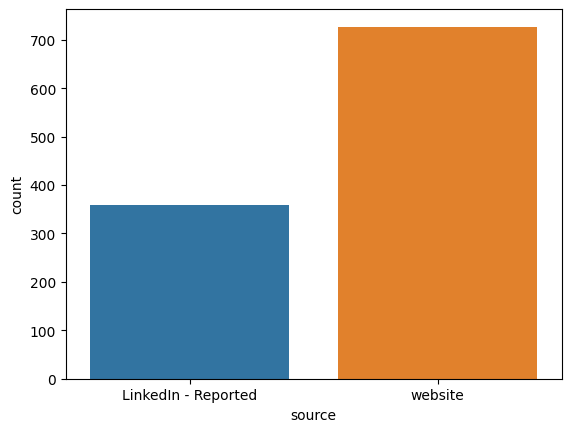

In [53]:
sns.countplot(data, x="source", hue="source");

The column `source` is inbalanced, with one category "website" significantly outperforming the other "LinkedIn - Reported". This imbalance may lead to biased model predictions if used as a target label.

**Recommendations:**
- Consider resampling (e.g. SMOTE) to balance the classes.
- Use class weight in models to address the imbalance.
- Evaluate model performance with metrics like precision, recall, or F1-score instead of accuracy.


#### Column 'created_at'

The `created_at` column contains datetime values representing the creation timestamp of each company. Feature engineering on this column can be valuable for temporal analysis. We can extract components such as the year, month, day of the week, and hour to explore trends over time, identify seasonality, and gain insights into company formation patterns. Additionally, it may be useful to create binary features such as weekday/weekend to further enhance exploration.

In [54]:
def feature_engineering_datetime(df, datetime_column='created_at'):
    """
    Simple feature engineering for the datetime column.
    Extract year, month, day of the week, and whether the date is a weekend
    """
    df[datetime_column] = pd.to_datetime(df[datetime_column])

    df['year'] = df[datetime_column].dt.year
    df['month'] = df[datetime_column].dt.month
    df['day'] = df[datetime_column].dt.day
    df['day_of_week'] = df[datetime_column].dt.dayofweek
    df['is_weekend'] = df[datetime_column].dt.weekday >=5
    df['hour'] = df[datetime_column].dt.hour

    return df

In [55]:
data = feature_engineering_datetime(data)

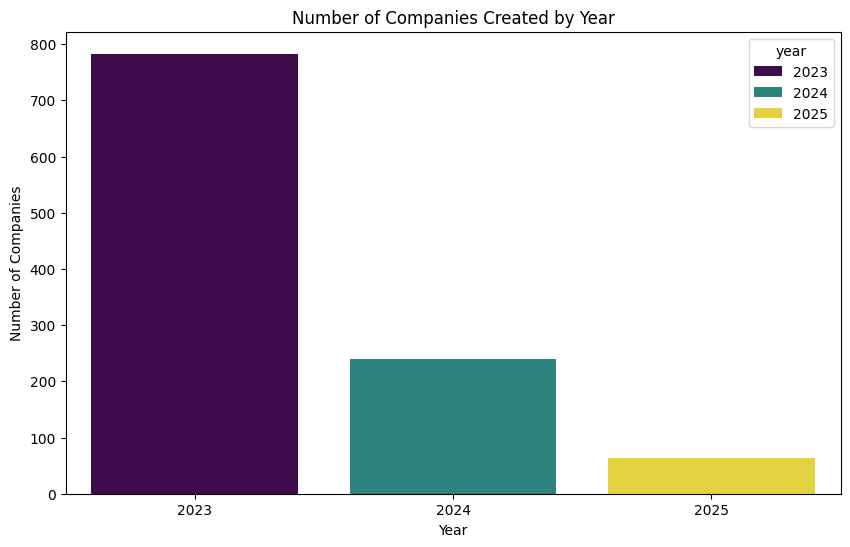

In [56]:
def plot_companies_by_year(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='year', hue='year', palette='viridis')
    plt.title('Number of Companies Created by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Companies')
    plt.show()

plot_companies_by_year(data)

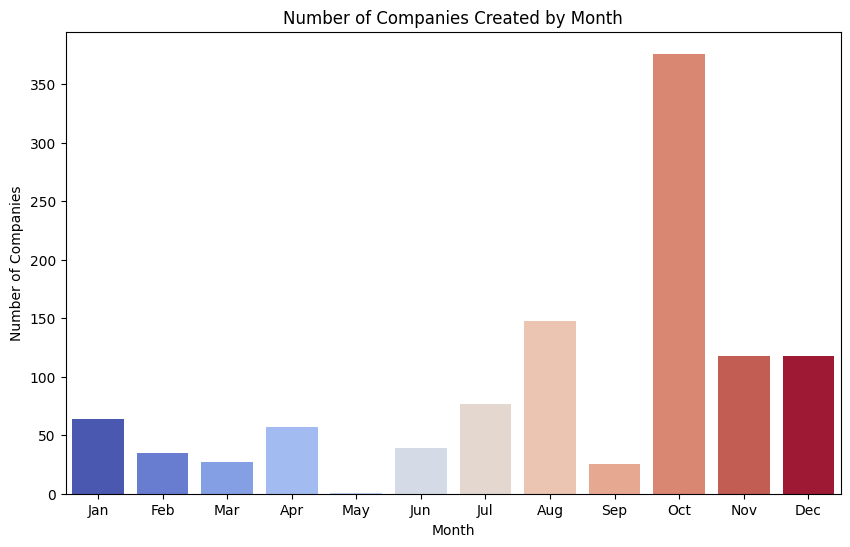

In [57]:
import calendar

def plot_companies_by_month(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='month', hue='month', palette='coolwarm', legend=False)
    plt.title('Number of Companies Created by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Companies')

    # Dinamically get month labels
    plt.xticks(ticks=range(0, 12), labels=calendar.month_abbr[1:13])
    plt.show()

plot_companies_by_month(data)

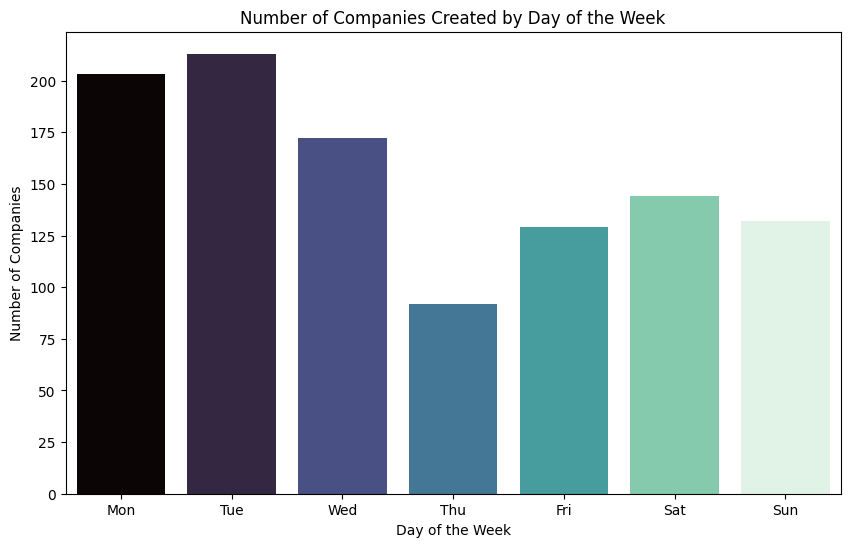

In [58]:
def plot_companies_by_day_of_week(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='day_of_week', hue='day_of_week', palette='mako', legend=False)
    plt.title('Number of Companies Created by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Companies')

    # Automate weekday labels
    plt.xticks(ticks=range(7), labels=calendar.day_abbr)
    plt.show()

plot_companies_by_day_of_week(data)

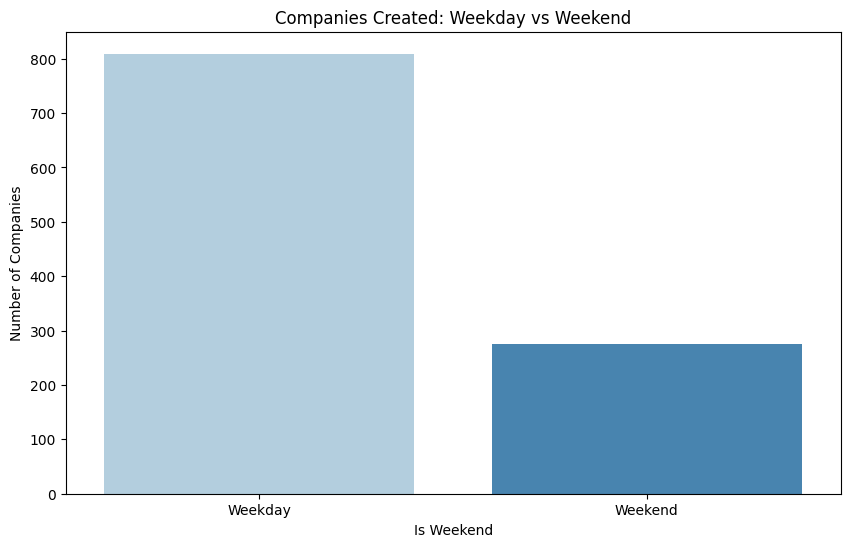

In [59]:
def plot_companies_by_weekend(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='is_weekend', hue='is_weekend', palette='Blues', legend=False)
    plt.title('Companies Created: Weekday vs Weekend')
    plt.xlabel('Is Weekend')
    plt.ylabel('Number of Companies')
    plt.xticks([0, 1], ['Weekday', 'Weekend'])
    plt.show()

plot_companies_by_weekend(data)

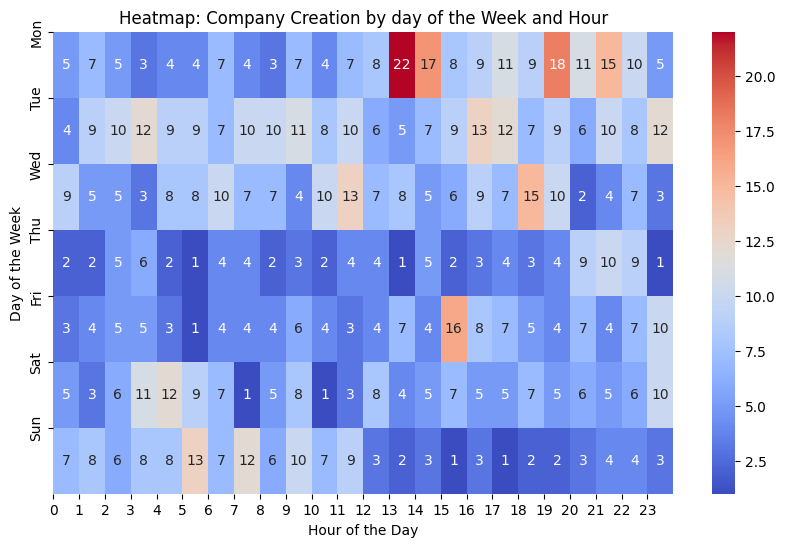

In [83]:
def plot_heatmap_day_hour(df):
    day_hour_df = data.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(day_hour_df, cmap='coolwarm', annot=True, fmt='d')
    plt.title('Heatmap: Company Creation by day of the Week and Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Day of the Week')
    plt.xticks(ticks=range(24), labels=range(24))
    plt.yticks(ticks=range(7), labels=calendar.day_abbr)
    plt.show()

plot_heatmap_day_hour(data)

#### Column 'company_description'

In [60]:
import random

def get_random_description(df, column='company_description', n=6):
    for i in range(n):
        company_description = random.choice(df[column].dropna().tolist())
        print(f"\n--- Description nr {i} ---\n")
        print(company_description)

get_random_description(data, n=6)


--- Description nr 0 ---

Candid is a platform organisation. We unite the creative and strategic strength of agencies such as the media agencies STROOM and M2Media, the digital agencies Online Company and Positive, advertising agency Creature , PR and communications agency Coopr and brand identity specialist Brand Potential.\ \ Our agencies deliver marketing and communication solutions that are inspired by data, enabled by technology and driven by creativity. \ \ But above all that achieve growth for our clients.

--- Description nr 1 ---

Yli sata vuotta monipuolisia jalometallituotteita Pohjoismaiden ja Baltian johtavalta valmistajalta! Kultakeskus on Pohjoismaiden johtava jalometallialan yritys. Suunnittelu ja valmistus, kultasepät ja kellojen maahantuonti.

--- Description nr 2 ---

For over 20 years we’ve worked with regional, national and international clients to deliver award winning on-site and online visitor experiences.\ \ We are a creative and passionate team of interpreter

In [61]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def count_and_remove_non_english_rows(df, column="company_description"):
    non_english_indices = []  # To store indices of non-English rows
    non_english_count = 0

    # Iterate through each row to detect the language
    for idx, text in df[column].dropna().items():
        try:
            if detect(text) != 'en':  # If detected language is not English
                non_english_count += 1
                non_english_indices.append(idx)  # Append the index of non-English rows
        except LangDetectException:
            # If language detection fails for some reason, we ignore that row
            non_english_indices.append(idx)  # Treat failed detections as non-English

    # Remove non-English rows by their indices
    df_cleaned = df.drop(non_english_indices)

    # Return the count of non-English rows and the cleaned DataFrame
    return non_english_count, df_cleaned


non_english_rows, cleaned_data = count_and_remove_non_english_rows(data)

print(f"Number of non-English rows: {non_english_rows}")
print(f"Shape of cleaned data: {cleaned_data.shape}")


Number of non-English rows: 147
Shape of cleaned data: (938, 10)


In [62]:
get_random_description(cleaned_data)


--- Description nr 0 ---

At Northeast Med Staff were all about flexibility for both healthcare facilities and healthcare professionals who provide direct patient care. If youre a nurse looking for employment options at exceptional facilities, or a facility manager searching

--- Description nr 1 ---

GigaStar fuels human creativity by bringing Creators and Investors together.

--- Description nr 2 ---

Exelanz is a managed IT service company into cross platform application development on Cloud, fully managed IT support and Cloud Computing services.

--- Description nr 3 ---

Details of the MUSO founder background stories - founded in 2009 and headquartered in London to solve the market challenges from unlicensed consumption.

--- Description nr 4 ---

We're actively working reduce our carbon footprint and positively contribute to the community. Explore our sustainability efforts today.

--- Description nr 5 ---

DO IT Organic is an organic food wholesaler, selling more than 1000 raw 

📝: Removing non-English rows might be useful for some analyses, but it could be valuable to further investigate
non-English descriptions separately or apply language-specific processing, depending on case.

In [63]:
import spacy
import re
import emoji

# Load spaCy model
nlp = spacy.load("en_core_web_md")

# Function to preprocess text using spaCy's stopwords
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove emojis
    text = emoji.replace_emoji(text, replace="")
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove special characters and numbers (only keep alphabetic characters)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Apply spaCy NLP pipeline (tokenization, lemmatization, etc.)
    doc = nlp(text)
    
    # Remove stopwords and non-alphabetic tokens, apply lemmatization
    cleaned_text = " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])
    
    return cleaned_text

# Example usage with a DataFrame
def preprocess_column(df, column="company_description"):
    df[column] = df[column].dropna().apply(preprocess_text)
    return df


In [64]:
preprocessed_df = preprocess_column(cleaned_data)
preprocessed_df

,company_description,source,is_edited,created_at,year,month,day,day_of_week,is_weekend,hour
id,,,,,,,,,,
370341,cegid lead provider cloud business management ...,LinkedIn - Reported,False,2023-08-05 12:22:59,2023,8,5,5,True,12
537105,page printer service orient printing company l...,LinkedIn - Reported,False,2023-10-31 02:53:58,2023,10,31,1,False,2
581168,unifrog wholeschool career destination platfor...,LinkedIn - Reported,False,2023-11-01 12:34:34,2023,11,1,2,False,12
353476,niche engineering concept supply found beagle ...,LinkedIn - Reported,False,2023-08-04 14:30:31,2023,8,4,4,False,14
420991,control datum collect money exploration group ...,website,False,2023-10-23 18:55:50,2023,10,23,0,False,18
...,...,...,...,...,...,...,...,...,...,...
524966,ft pipeline system manufacture coat line steel...,website,False,2023-10-30 18:32:13,2023,10,30,0,False,18
670386,found datakwip mission change way world view e...,website,False,2023-12-15 21:16:57,2023,12,15,4,False,21
641607,onramp dynamic customer onboarding software he...,LinkedIn - Reported,False,2023-12-04 21:49:02,2023,12,4,0,False,21


In [65]:
get_random_description(preprocessed_df, n=6)


--- Description nr 0 ---

karpalogroup award advertising agency specialize health care marketing communcation

--- Description nr 1 ---

nationwide recruitment agency vast expertise range healthcare teaching profession contain trading division hcl workforce solutions medicare team crg healthcare staffing crg defence sugarman health wellbee sugarman medical mind sugarman occupational health service sugarman occupational health recruitment sugarman education cer education monarch education

--- Description nr 2 ---

empower organization understand intelligently decarbonize operation hourly track emission datum

--- Description nr 3 ---

world forward quiet capital builder invest remarkable founder day zero

--- Description nr 4 ---

gigastar fuel human creativity bring creator investor

--- Description nr 5 ---

traffic solution lead provider traffic safety message solution portable durable traffic safety device webbased solution help customer calm traffic share information collect datu

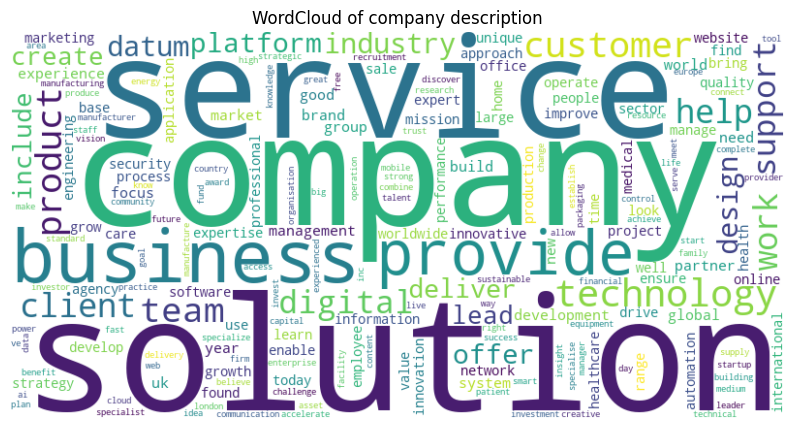

In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcould(df, column="company_description"):
    # Join all descriptions into one large string
    corpus = " ".join(df[column])

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(corpus)

    # Display the WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f"WordCloud of {column.replace('_', ' '.title())}")
    plt.show()

generate_wordcould(preprocessed_df)


In [67]:
preprocessed_df

,company_description,source,is_edited,created_at,year,month,day,day_of_week,is_weekend,hour
id,,,,,,,,,,
370341,cegid lead provider cloud business management ...,LinkedIn - Reported,False,2023-08-05 12:22:59,2023,8,5,5,True,12
537105,page printer service orient printing company l...,LinkedIn - Reported,False,2023-10-31 02:53:58,2023,10,31,1,False,2
581168,unifrog wholeschool career destination platfor...,LinkedIn - Reported,False,2023-11-01 12:34:34,2023,11,1,2,False,12
353476,niche engineering concept supply found beagle ...,LinkedIn - Reported,False,2023-08-04 14:30:31,2023,8,4,4,False,14
420991,control datum collect money exploration group ...,website,False,2023-10-23 18:55:50,2023,10,23,0,False,18
...,...,...,...,...,...,...,...,...,...,...
524966,ft pipeline system manufacture coat line steel...,website,False,2023-10-30 18:32:13,2023,10,30,0,False,18
670386,found datakwip mission change way world view e...,website,False,2023-12-15 21:16:57,2023,12,15,4,False,21
641607,onramp dynamic customer onboarding software he...,LinkedIn - Reported,False,2023-12-04 21:49:02,2023,12,4,0,False,21


### Things to do if more time given.

**Missing Values**
- Missing values were dropped; however, if more were present, advanced imputation techniques could be implemented, such as filling with the median or mode, or using predictive models to estimate missing values.

**Feature Engineering**
- Additional features could be derived from text, such as character length, word frequency, or extracting entities like `company` or `location` using Hugging Face models or spaCy.

- More advanced techniques for text vectorization could be explored, such as leveraging transformer-based models (e.g., BERT, Sentence Transformers) to generate embeddings that capture semantic meaning—typically leading to improved model performance.
- Character-level embeddings could be created and incorporated as a layer in a deep learning model.

**Preprocessing**
- The text contains emojis, inconsistently capitalized words, and different languages; these issues can be addressed through preprocessing steps to standardize input data.
- Standarize new features depends on what ml or deep learning model we are going to use.

**Visualization**
- Additional visualizations could be implemented, such as analyzing description lengths, word frequencies, or using pair plots and correlation heatmaps to uncover potential patterns in the data.

**Reproducibility**
- Modular coding practices could be introduced to improve code maintainability, enhance reproducibility, and streamline experimentation.
- Error handling, unittest
- Docerize pipeline 



